# Clustering

This section tries to cluster the different politicians based on their written words recieved from the data cleaning. The hypothesis is that the candidates will cluster together with their colleagues from their own party, but a fun tendency could be the exact opposite. 

## Data preparation

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [207]:
df_politicians = pd.read_csv("Data/similarity_scores_minhash.csv")
df_politicians.set_index("Unnamed: 0", inplace=True)
df_politicians.index.name = None
df_politicians

,magnus_heunicke,nicolai_wammen,mattias_tesfaye,jakob_ellemann,soren_gade,sophie_lohde,lars_lokke,jakob_engel_schmidt,monika_rubin,jacob_mark,...,katrine_robsoe,pernille_vermund,lars_mathiesen,kim_andersen,franciska_rosenkilde,christina_olumeko,torsten_gejl,morten_messerschmidt,pia_kjarsgaard,peter_kofod
magnus_heunicke,1.000000,0.109057,0.183432,0.153846,0.039861,0.158301,0.140684,0.185771,0.265823,0.162791,...,0.098901,0.140684,0.167315,0.090909,0.121495,0.098901,0.123596,0.136364,0.113173,0.121495
nicolai_wammen,0.109057,1.000000,0.100917,0.094891,0.041667,0.077199,0.088929,0.125704,0.113173,0.073345,...,0.058201,0.098901,0.088929,0.075269,0.086957,0.045296,0.086957,0.127820,0.123596,0.129944
mattias_tesfaye,0.183432,0.100917,1.000000,0.149425,0.061947,0.165049,0.129944,0.260504,0.242236,0.127820,...,0.081081,0.156069,0.134216,0.123596,0.104972,0.094891,0.167315,0.212121,0.224490,0.212121
jakob_ellemann,0.153846,0.094891,0.149425,1.000000,0.058201,0.169591,0.190476,0.226994,0.202405,0.138520,...,0.111111,0.149425,0.158301,0.171875,0.067616,0.079137,0.125704,0.125704,0.190476,0.158301
soren_gade,0.039861,0.041667,0.061947,0.058201,1.000000,0.034483,0.027397,0.041667,0.048951,0.029160,...,0.048951,0.038062,0.038062,0.018676,0.045296,0.029160,0.038062,0.038062,0.056338,0.043478
sophie_lohde,0.158301,0.077199,0.165049,0.169591,0.034483,1.000000,0.145038,0.178782,0.185771,0.156069,...,0.084991,0.145038,0.134216,0.138520,0.073345,0.096892,0.151631,0.185771,0.156069,0.123596
lars_lokke,0.140684,0.088929,0.129944,0.190476,0.027397,0.145038,1.000000,0.212121,0.174168,0.138520,...,0.083032,0.117318,0.127820,0.100917,0.067616,0.121495,0.127820,0.125704,0.125704,0.127820
jakob_engel_schmidt,0.185771,0.125704,0.260504,0.226994,0.041667,0.178782,0.212121,1.000000,0.351351,0.188119,...,0.113173,0.200000,0.219512,0.160542,0.094891,0.119403,0.209677,0.252610,0.237113,0.202405
monika_rubin,0.265823,0.113173,0.242236,0.202405,0.048951,0.185771,0.174168,0.351351,1.000000,0.239669,...,0.153846,0.188119,0.176471,0.181102,0.136364,0.136364,0.204819,0.183432,0.200000,0.183432
jacob_mark,0.162791,0.073345,0.127820,0.138520,0.029160,0.156069,0.138520,0.188119,0.239669,1.000000,...,0.104972,0.134216,0.181102,0.136364,0.127820,0.104972,0.165049,0.125704,0.092896,0.104972


In [ ]:
parties = pd.read_csv("Data/Giant.csv").Party

marker_dic = {'socialdemokratiet' : "$A$",
                'radikale' : "$B$",
                'venstre' : "$V$",
                'alternativet' : "$Å$",
                'moderaterne' : "$M$",
                'enhedslisten' : "$Ø$",
                'sf' : "$S$",
                'liberal_alliance' : "$L$",
                'dansk_folkeparti' : "$O$",
                'danmarksdemokraterne' : "$Æ$",
                'nye_borgerlige' : "$N$",
                'konservative' : "$C$"}

d = {'Person': df_politicians.index,
     'Party': parties, 
     'marker': [marker_dic[i] for i in parties]}

scatter_df = pd.DataFrame(d)
scatter_df

## Kmeans clustering without PCA

In [119]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(df_politicians)
label = kmeans.labels_

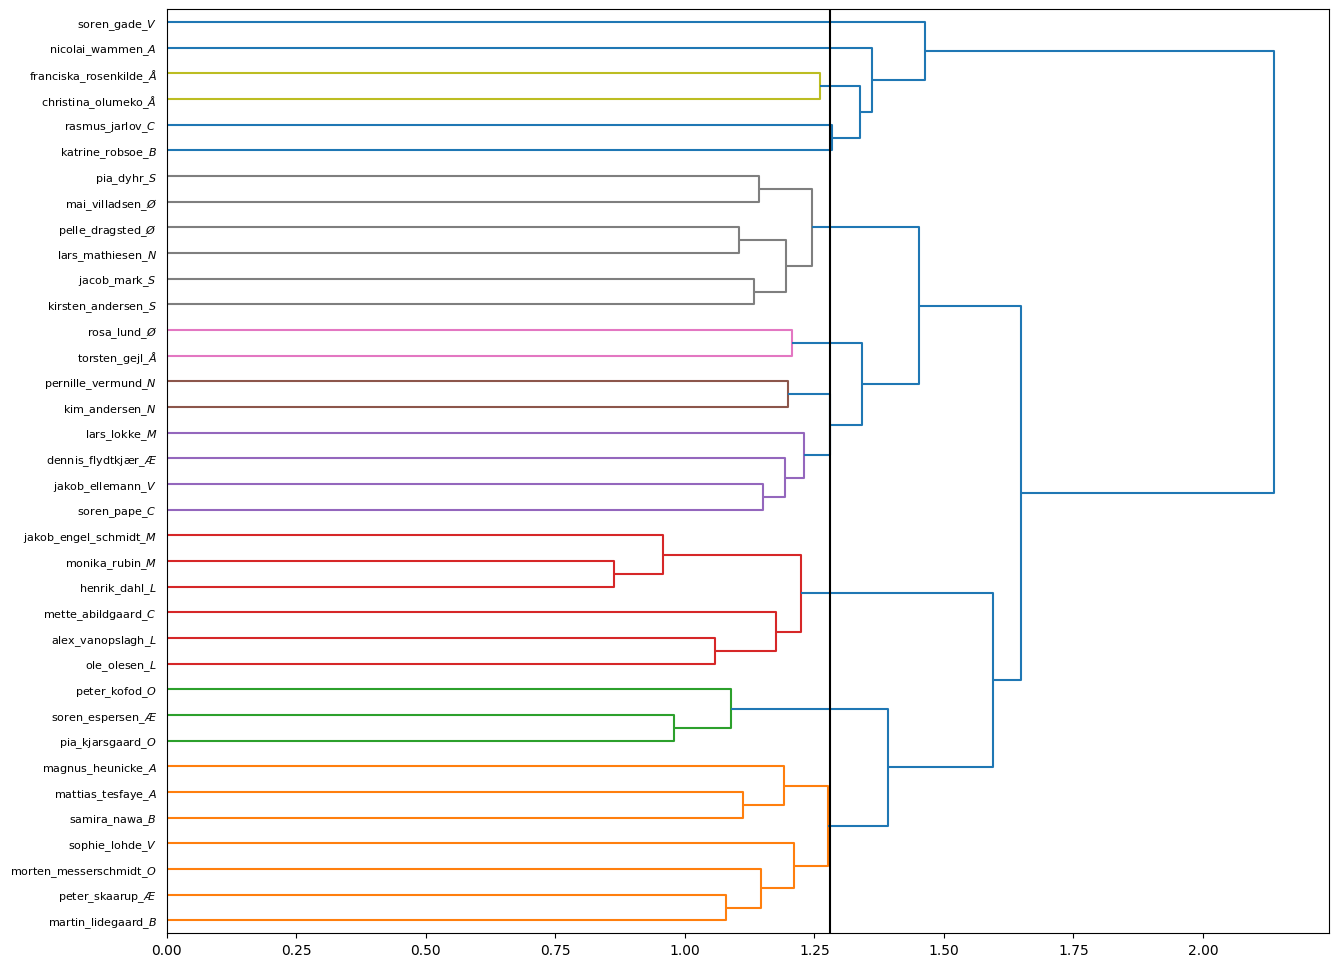

In [145]:
dendo_data = df_politicians
linked = linkage(dendo_data, 'ward')

labelList = df_politicians.index  +"_"+ scatter_df['marker'].values
#labelList = df_politicians['Person'].values

plt.figure(figsize=(15, 12))
d = dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False,
            color_threshold=1.28
          )
plt.axvline(x=1.28, c='k')
plt.show()

In [146]:
from scipy.cluster.hierarchy import fcluster
cluster_no_pca = fcluster(linked, 1.28, criterion='distance')

## Kmeans Clustering with PCA

In [122]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df_politicians)

In [123]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(df)
label = kmeans.labels_

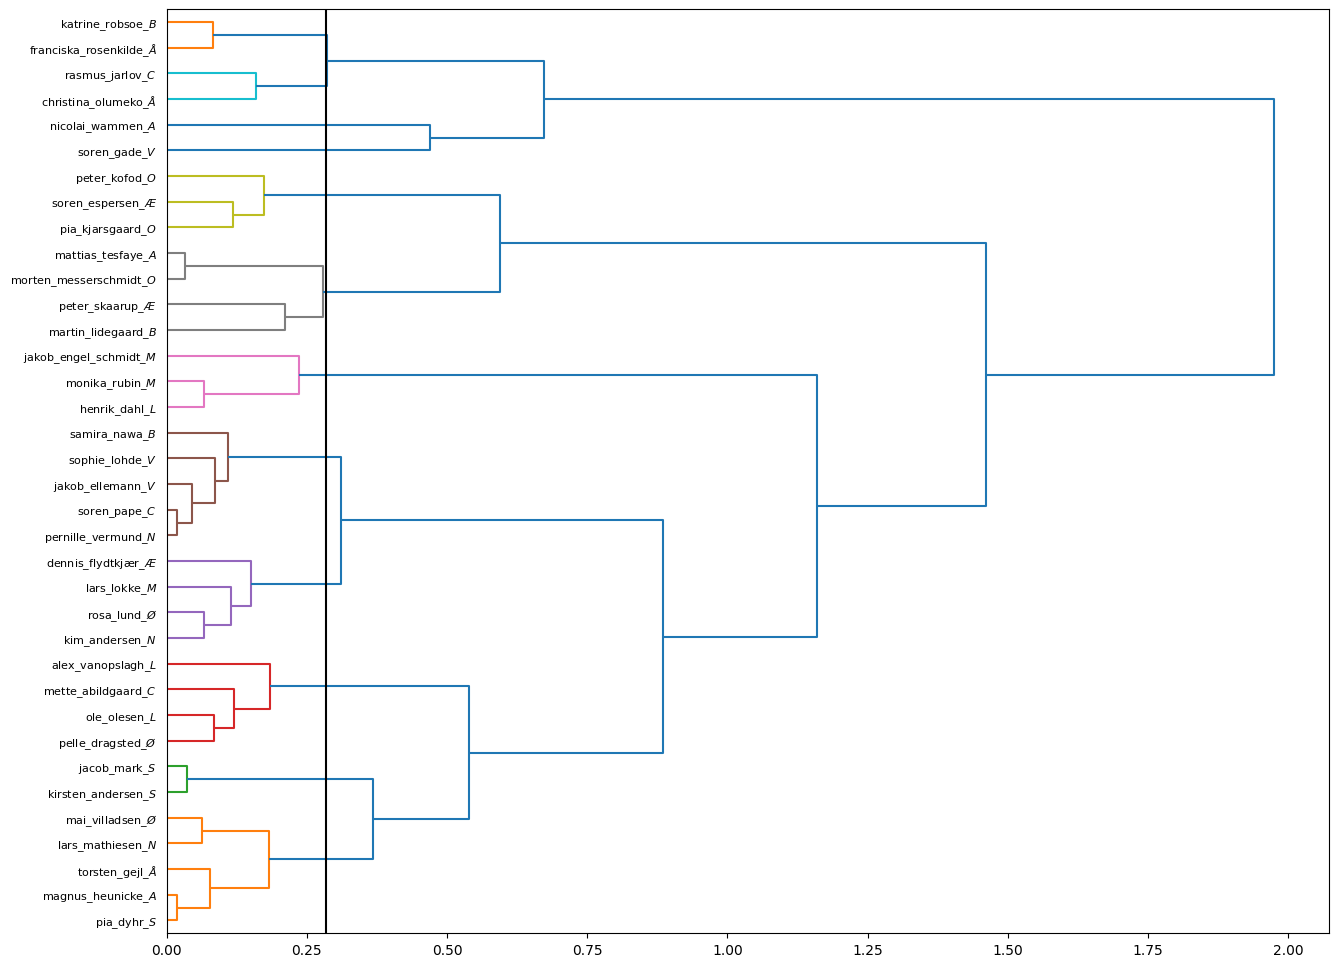

In [208]:
dendo_data = df
linked = linkage(dendo_data, 'ward')

labelList = df_politicians.index +"_"+ scatter_df['marker'].values

plt.figure(figsize=(15, 12))
d = dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False,
            color_threshold=0.285
          )
plt.axvline(x=0.285, c='k')
plt.show()

In [182]:
fcluster(linked, 0.285, criterion='distance')

array([12,  3,  6,  8,  4,  8,  9,  7,  7, 11, 12, 11,  9,  6,  5, 10,  7,
       10,  8, 10,  2, 10, 12,  9,  6,  8,  1,  8, 12,  9,  1,  2, 12,  6,
        5,  5], dtype=int32)

In [204]:
import random

number_of_colors = 12

d_leaf_color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_14482/2293869081.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(dendo_data[point, 0], dendo_data[point, 1], 'o', color=d_leaf_color[fcluster(linked, 0.285, criterion='distance')[point] - 1], marker=scatter_df['marker'].values[point], markersize=10)


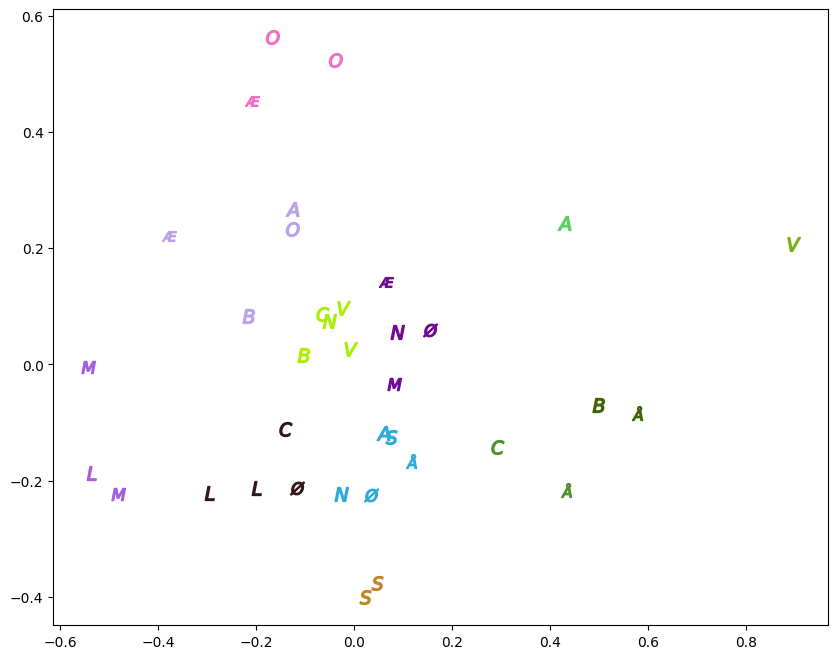

In [205]:
plt.figure(figsize=(10, 8))

points = d['leaves']
colors = ['none'] * len(points)
for xs, c in zip(d['icoord'], d['color_list']):
    for xi in xs:
        if xi % 10 == 5:
            colors[(int(xi)-5) // 10] = c

for point, color in zip(points, colors):
    plt.plot(dendo_data[point, 0], dendo_data[point, 1], 'o', color=d_leaf_color[fcluster(linked, 0.285, criterion='distance')[point] - 1], marker=scatter_df['marker'].values[point], markersize=10)
    #plt.text(dendo_data[point, 0], dendo_data[point, 1], f' {point}')
plt.show()

In [62]:
parties = pd.read_csv("Data/Giant.csv").Party

In [99]:
d = {'Person': df_politicians.index,
     'Party': parties, 
     'marker': [marker_dic[i] for i in parties], 
     'Cluster_nopca': cluster_no_pca, 
     'Cluster_pca': label,
     'pca_point': [df[i] for i in range(len(df))]}

scatter_df = pd.DataFrame(d)
scatter_df

,Person,Party,marker,Cluster_nopca,Cluster_pca,pca_point
0,magnus_heunicke,socialdemokratiet,$A$,12,8,"[0.05849571517850671, -0.11822851215541957]"
1,nicolai_wammen,socialdemokratiet,$A$,4,6,"[0.4273151269048971, 0.24319151703104333]"
2,mattias_tesfaye,socialdemokratiet,$A$,12,11,"[-0.12772865831338748, 0.267088372241667]"
3,jakob_ellemann,venstre,$V$,9,1,"[-0.023207271258924952, 0.09720966456328521]"
4,soren_gade,venstre,$V$,5,2,"[0.8953906446270585, 0.2079573603820771]"
5,sophie_lohde,venstre,$V$,12,1,"[-0.00789254900220322, 0.027136077241836788]"
6,lars_lokke,moderaterne,$M$,9,7,"[0.08180981500917742, -0.0336687318572963]"
7,jakob_engel_schmidt,moderaterne,$M$,10,5,"[-0.5423899985161488, -0.0039938538366042255]"
8,monika_rubin,moderaterne,$M$,10,5,"[-0.48180691122524333, -0.22360065024269368]"
9,jacob_mark,sf,$S$,6,0,"[0.046018303316689456, -0.37579717193677187]"


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30797f9c-952e-45b4-98d4-31c9ac73ae78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

## Heatmap of politicians

<AxesSubplot:>

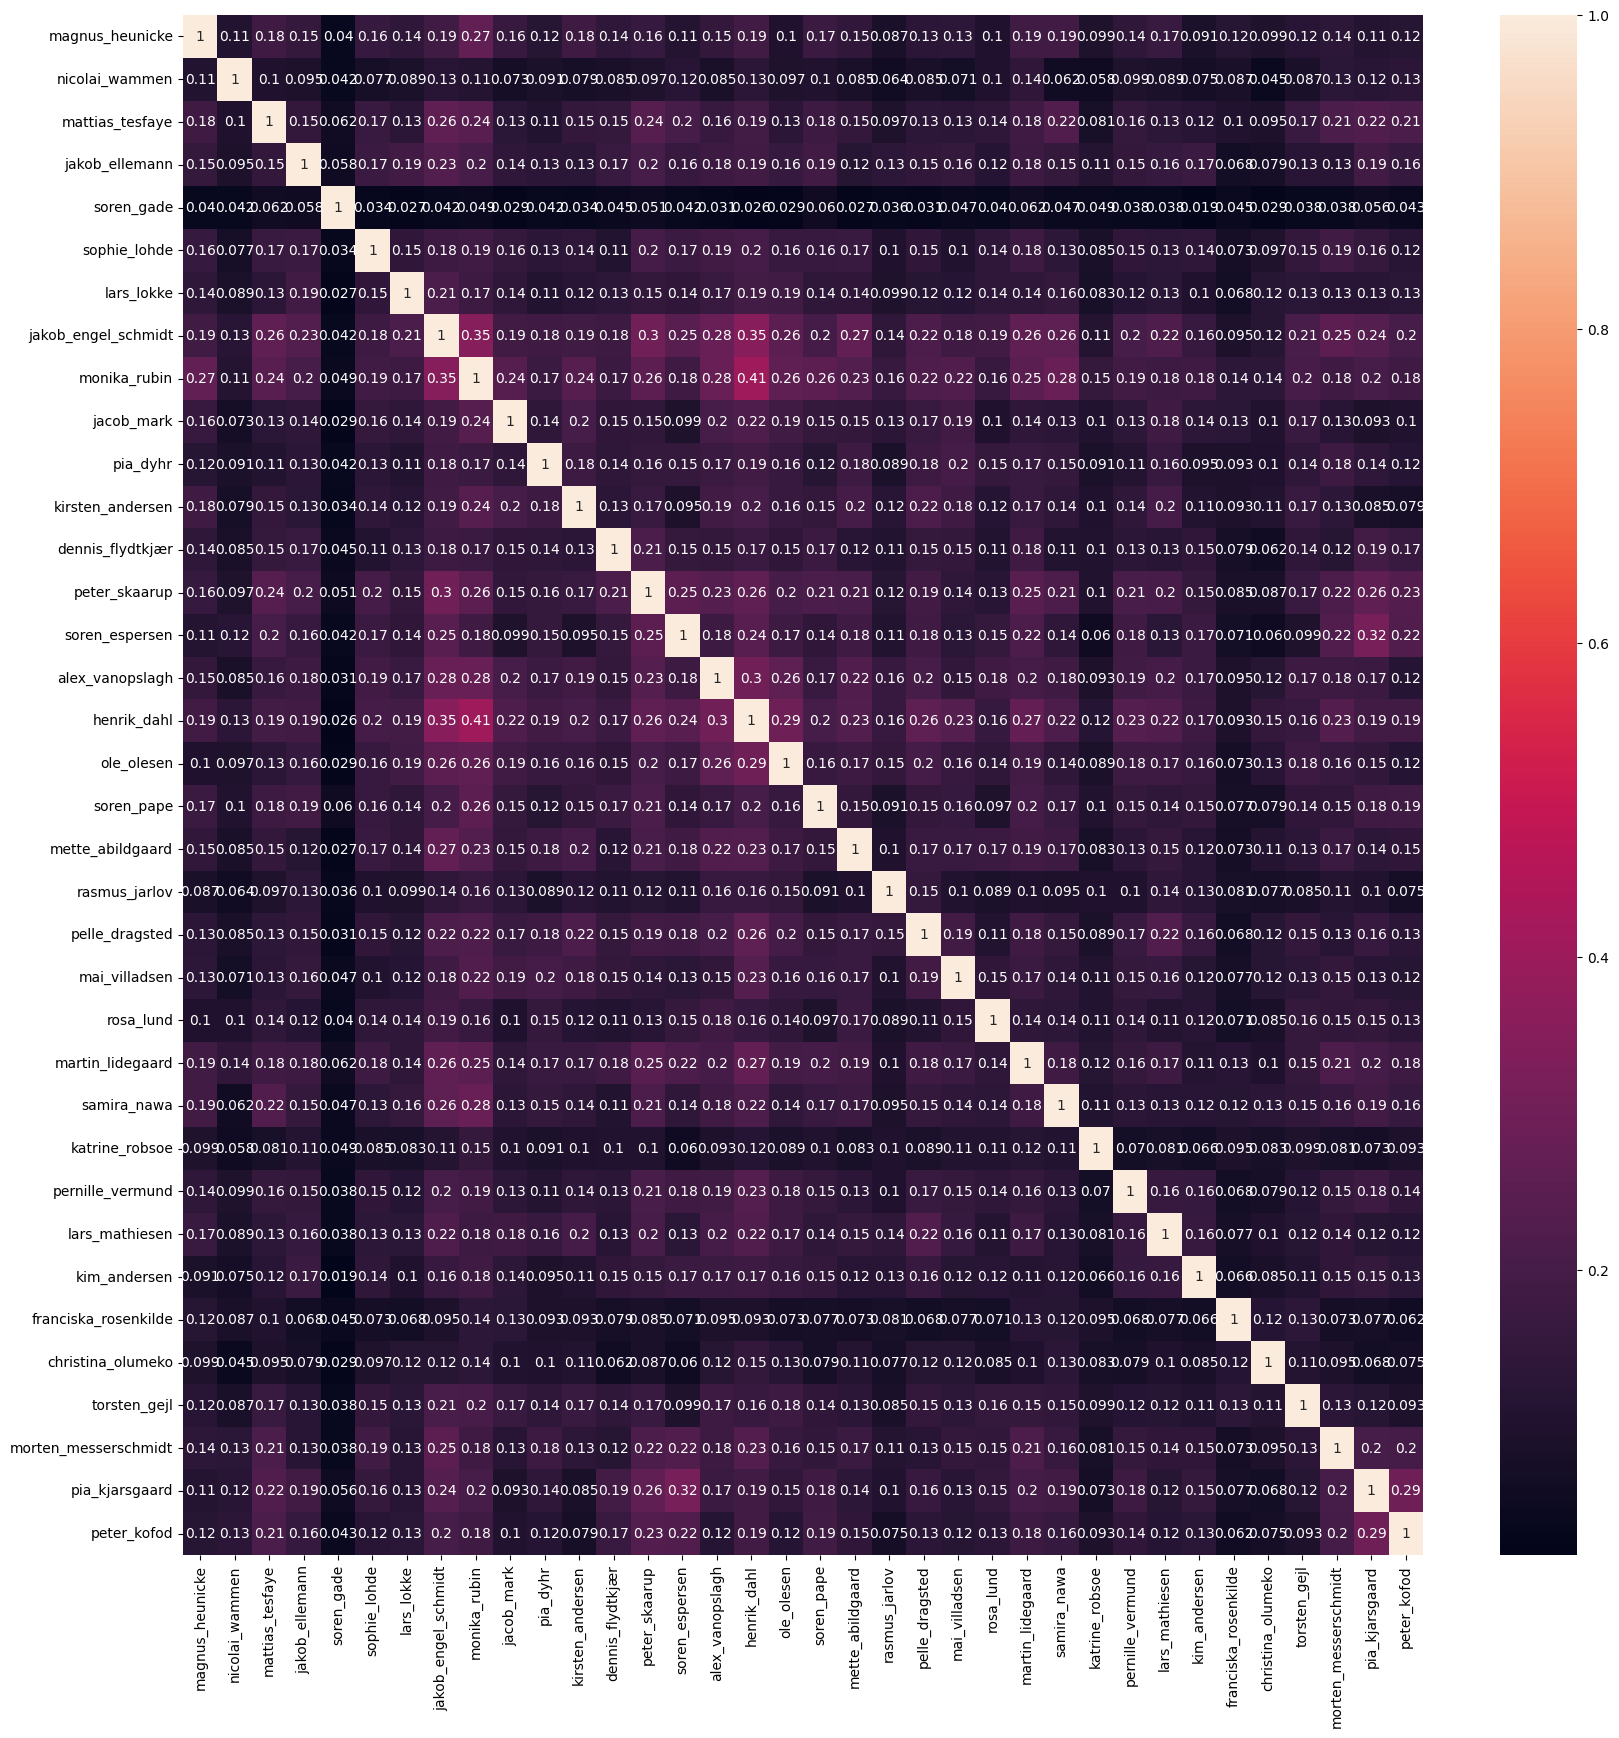

In [20]:
heatmap_data = df_politicians.copy()

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(heatmap_data, ax=ax, xticklabels=True, yticklabels=True, annot=True)
